In [2]:
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np

drive.mount('/content/drive')

data_folder_url = '/content/drive/MyDrive/Education_dataset_V2/'
data_folder_url_clean = '/content/drive/MyDrive/dataset_cleaned/'

df_diem = pd.read_excel(data_folder_url + '02.diem.xlsx')
df_DTB_TK = pd.read_excel(data_folder_url + 'sinhvien_dtb_toankhoa.xlsx')

Mounted at /content/drive


In [3]:
freq_encoding = df_diem[" mamh"].value_counts() / len(df_diem)

df_diem["mamh_encode"] = df_diem[" mamh"].map(freq_encoding)

df_merged = pd.merge(df_diem, df_DTB_TK, on='mssv', how='inner')

print(df_merged)

X = df_merged.drop(columns=["mssv", "dtb_toankhoa", " malop", " mamh", " mamh_tt", "dtb_tichluy", "sotc_tichluy", "id"])
y = df_merged["dtb_toankhoa"]

             id                                      mssv    mamh  \
0      188378.0  599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V   IT001   
1      188379.0  FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3   IT001   
2      188380.0  51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe   IT001   
3      188381.0  6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE   IT001   
4      188382.0  2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ   IT001   
...         ...                                       ...     ...   
98026       NaN  577C2F7AXPvAibaEXe+02ryNj/uIX7kQnyK7nQCD   IT005   
98027       NaN  D1C33C40XPvAibaEXe9xHju59ydahS2HvMczzT5k   IT005   
98028       NaN  882FB1B0XPvAibaEXe8y6/RMXZRwBebw/cEMIAJK   IT005   
98029       NaN  2FCE0D1DXPvAibaEXe+4XPPXlKRz0GVlqKh+FNRG   IT005   
98030       NaN  709876F2XPvAibaEXe9fw8mX+aV2oweP33XrQ8TL   IT005   

                 malop   sotc   namhoc   hocky   diem   trangthai  mamh_tt  \
0       IT001.E11.ANTT    4.0   2013.0     1.0    2.5         2.0     NULL   
1       IT001.E

Feature Importances based on Mean Decrease in Impurity:
       Feature  Importance
3         diem    0.619667
4    trangthai    0.148042
5  mamh_encode    0.135432
1       namhoc    0.043841
0         sotc    0.027846
2        hocky    0.025171


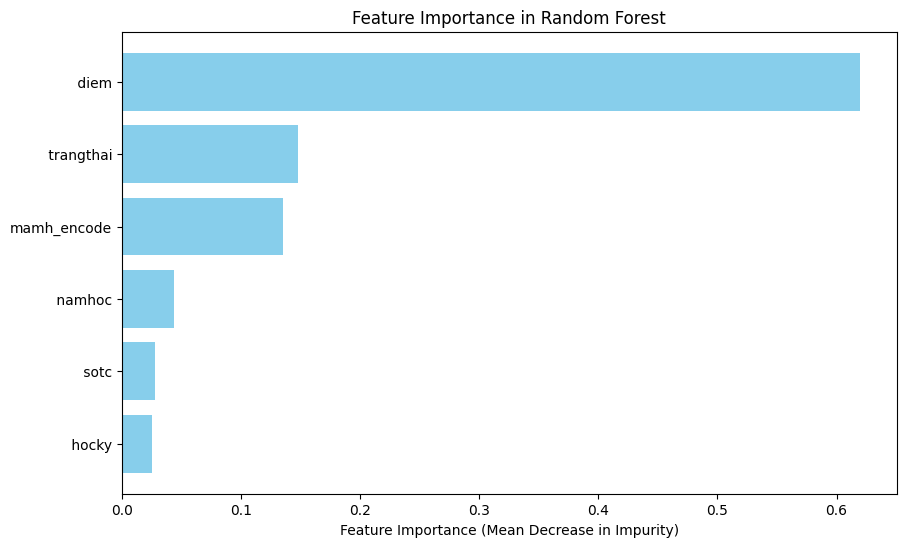

In [4]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

rf_importances = rf_model.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances based on Mean Decrease in Impurity:")
print(rf_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df["Feature"], rf_feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance (Mean Decrease in Impurity)")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

Feature Importances from XGBoost:
       Feature  Importance
4    trangthai    0.536207
3         diem    0.322206
5  mamh_encode    0.044894
2        hocky    0.042539
0         sotc    0.034260
1       namhoc    0.019894


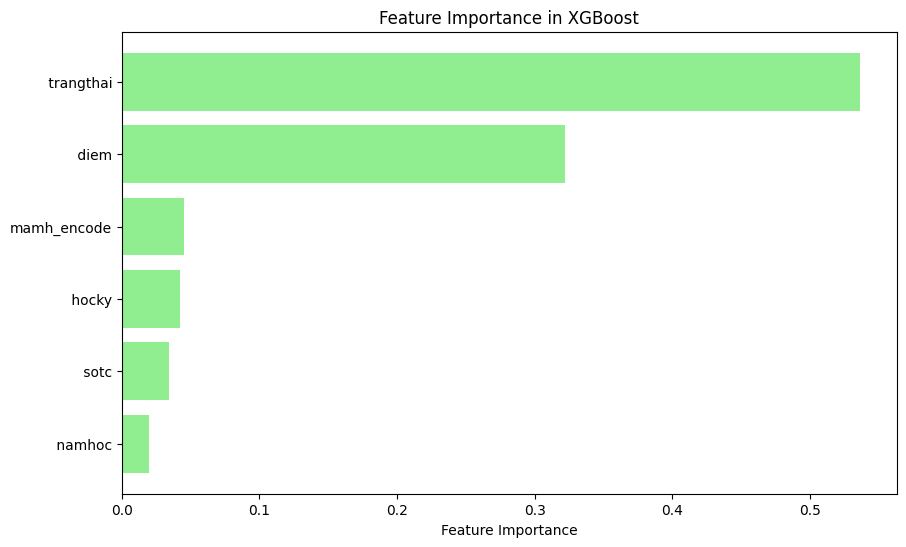

In [5]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

xgb_importances = xgb_model.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances from XGBoost:")
print(xgb_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_df["Feature"], xgb_feature_importance_df["Importance"], color="lightgreen")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost")
plt.gca().invert_yaxis()
plt.show()

Feature Importances from Lasso Regression:
       Feature  Importance
4    trangthai    0.767172
3         diem    0.468395
0         sotc    0.107482
2        hocky    0.072067
1       namhoc    0.063347
5  mamh_encode    0.000000


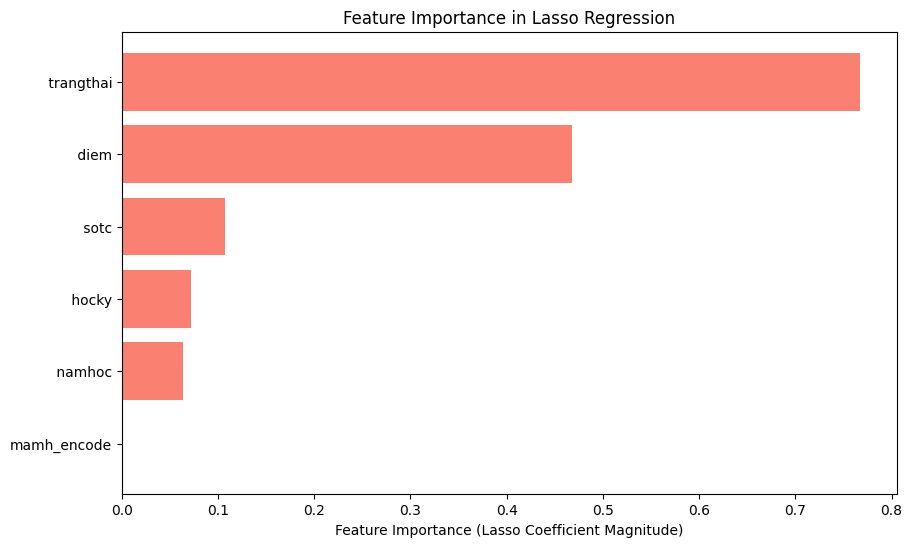

In [6]:
lasso_model = Lasso(alpha=0.01, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_imputed, y)

lasso_importances = np.abs(lasso_model.coef_)

lasso_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lasso_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances from Lasso Regression:")
print(lasso_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(lasso_feature_importance_df["Feature"], lasso_feature_importance_df["Importance"], color="salmon")
plt.xlabel("Feature Importance (Lasso Coefficient Magnitude)")
plt.title("Feature Importance in Lasso Regression")
plt.gca().invert_yaxis()
plt.show()

In [7]:
df_diemThu = pd.read_excel(data_folder_url + 'diem_Thu.xlsx')

freq_encoding = df_diemThu["mamh"].value_counts() / len(df_diemThu)

df_diemThu["mamh_encode"] = df_diemThu["mamh"].map(freq_encoding)

df_merged = pd.merge(df_diemThu, df_DTB_TK, on='mssv', how='inner')

print(df_merged)

X = df_merged.drop(columns=["mssv", "dtb_toankhoa", "malop", "mamh", "mamh_tt", "dtb_tichluy", "sotc_tichluy"])
y = df_merged["dtb_toankhoa"]


                                            mssv   mamh           malop  sotc  \
0       599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V  IT001  IT001.E11.ANTT     4   
1       FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3  IT001  IT001.E11.ANTT     4   
2       51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe  IT001  IT001.E11.ANTT     4   
3       6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE  IT001  IT001.E11.ANTT     4   
4       2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ  IT001  IT001.E11.ANTT     4   
...                                          ...    ...             ...   ...   
456283  78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk  IE101    IE101.N11.LT     3   
456284  35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd  IE101    IE101.N11.LT     3   
456285  7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi  IE101    IE101.N11.LT     3   
456286  658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE  IE101    IE101.N11.LT     3   
456287  7114E632XPvAibaEXe/VxWgTgtHe08jgqfqtydmc  IE101    IE101.N11.LT     3   

        hocky  namhoc  diem

Feature Importances based on Mean Decrease in Impurity:
        Feature  Importance
6       diem_ck    0.311659
7       diem_hp    0.223302
10  mamh_encode    0.108894
5       diem_gk    0.073476
2        namhoc    0.071538
8     trangthai    0.062101
3       diem_qt    0.050533
4       diem_th    0.037508
0          sotc    0.022791
9     tinhtrang    0.019413
1         hocky    0.018785


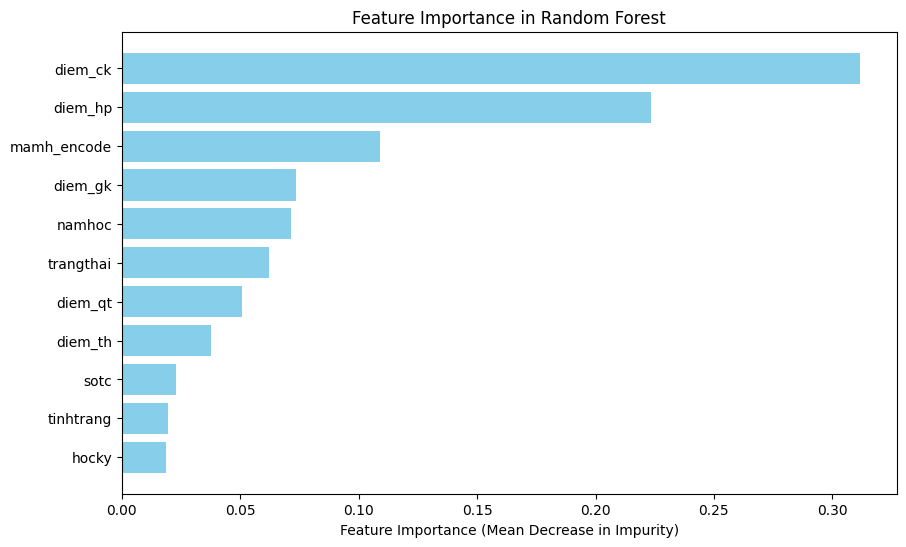

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

rf_importances = rf_model.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances based on Mean Decrease in Impurity:")
print(rf_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df["Feature"], rf_feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance (Mean Decrease in Impurity)")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

Feature Importances from XGBoost:
        Feature  Importance
6       diem_ck    0.336445
8     trangthai    0.240263
7       diem_hp    0.209665
9     tinhtrang    0.049856
5       diem_gk    0.039156
2        namhoc    0.036478
10  mamh_encode    0.028330
0          sotc    0.020144
4       diem_th    0.015195
1         hocky    0.014045
3       diem_qt    0.010423


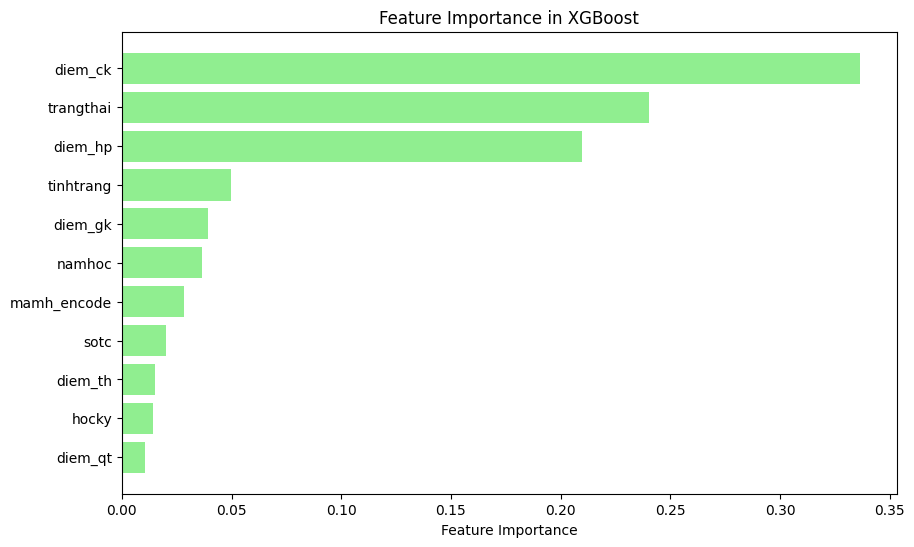

In [9]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

xgb_importances = xgb_model.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances from XGBoost:")
print(xgb_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_df["Feature"], xgb_feature_importance_df["Importance"], color="lightgreen")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost")
plt.gca().invert_yaxis()
plt.show()

Feature Importances from Lasso Regression:
        Feature  Importance
8     trangthai    0.613591
7       diem_hp    0.243753
9     tinhtrang    0.106375
5       diem_gk    0.090735
2        namhoc    0.073524
1         hocky    0.068528
4       diem_th    0.064479
6       diem_ck    0.064219
3       diem_qt    0.033480
0          sotc    0.030376
10  mamh_encode    0.000000


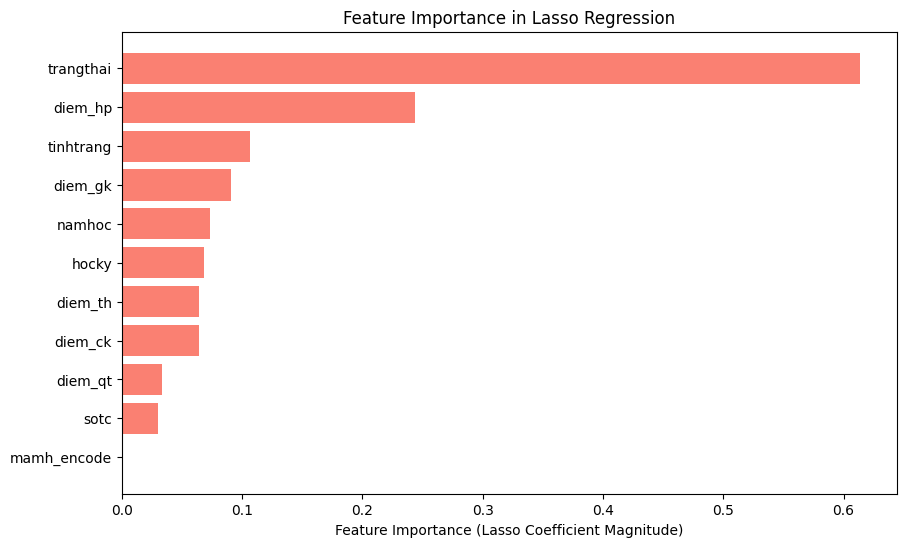

In [10]:
lasso_model = Lasso(alpha=0.01, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_imputed, y)

lasso_importances = np.abs(lasso_model.coef_)

lasso_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lasso_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances from Lasso Regression:")
print(lasso_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(lasso_feature_importance_df["Feature"], lasso_feature_importance_df["Importance"], color="salmon")
plt.xlabel("Feature Importance (Lasso Coefficient Magnitude)")
plt.title("Feature Importance in Lasso Regression")
plt.gca().invert_yaxis()
plt.show()

In [21]:
df_sinhvien = pd.read_excel(data_folder_url + '01.sinhvien.xlsx')
df_sinhvien.columns = df_sinhvien.columns.str.strip()

freq_encoding = df_sinhvien["khoa"].value_counts() / len(df_sinhvien)
df_sinhvien["khoa_encode"] = df_sinhvien["khoa"].map(freq_encoding)

freq_encoding = df_sinhvien["hedt"].value_counts() / len(df_sinhvien)
df_sinhvien["hedt_encode"] = df_sinhvien["hedt"].map(freq_encoding)

freq_encoding = df_sinhvien["chuyennganh2"].value_counts() / len(df_sinhvien)
df_sinhvien["chuyennganh2_encode"] = df_sinhvien["chuyennganh2"].map(freq_encoding)

df_merged = pd.merge(df_sinhvien, df_DTB_TK, on='mssv', how='inner')

print(df_merged)

X = df_merged[["gioitinh", "khoa_encode","hedt_encode", "chuyennganh2_encode", "khoahoc", "tinhtrang"]]
y = df_merged["dtb_toankhoa"]

           id                                      mssv  namsinh  gioitinh  \
0         1.0  BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2   1995.0       1.0   
1         2.0  2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM   1995.0       1.0   
2         3.0  83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt   1994.0       1.0   
3         4.0  91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu   1995.0       1.0   
4         5.0  007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6   1995.0       1.0   
...       ...                                       ...      ...       ...   
8228  19265.0  418187C9XPvAibaEXe8Wb350a8ibnhbWI4z++VY2   2001.0       0.0   
8229  19266.0  738946F2XPvAibaEXe8Wb350a8ibnm5kQzFjIM2p   2001.0       0.0   
8230  19267.0  332E756EXPvAibaEXe8Wb350a8ibnvs4VyUWS40K   2001.0       0.0   
8231  19284.0  AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3   2001.0       1.0   
8232  19285.0  75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM   2001.0       1.0   

                       noisinh        lopsh     khoa   hedt  kh

Feature Importances based on Mean Decrease in Impurity:
               Feature  Importance
5            tinhtrang    0.839238
4              khoahoc    0.063122
2          hedt_encode    0.035728
3  chuyennganh2_encode    0.030602
1          khoa_encode    0.017158
0             gioitinh    0.014152


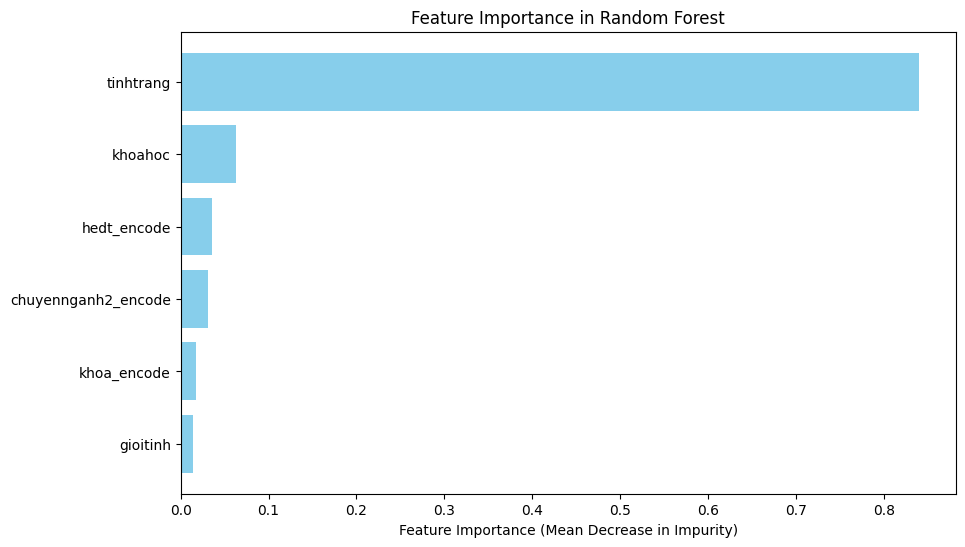

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

rf_importances = rf_model.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances based on Mean Decrease in Impurity:")
print(rf_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df["Feature"], rf_feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance (Mean Decrease in Impurity)")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

Feature Importances from XGBoost:
               Feature  Importance
5            tinhtrang    0.842312
2          hedt_encode    0.055144
4              khoahoc    0.034145
3  chuyennganh2_encode    0.028290
0             gioitinh    0.024076
1          khoa_encode    0.016032


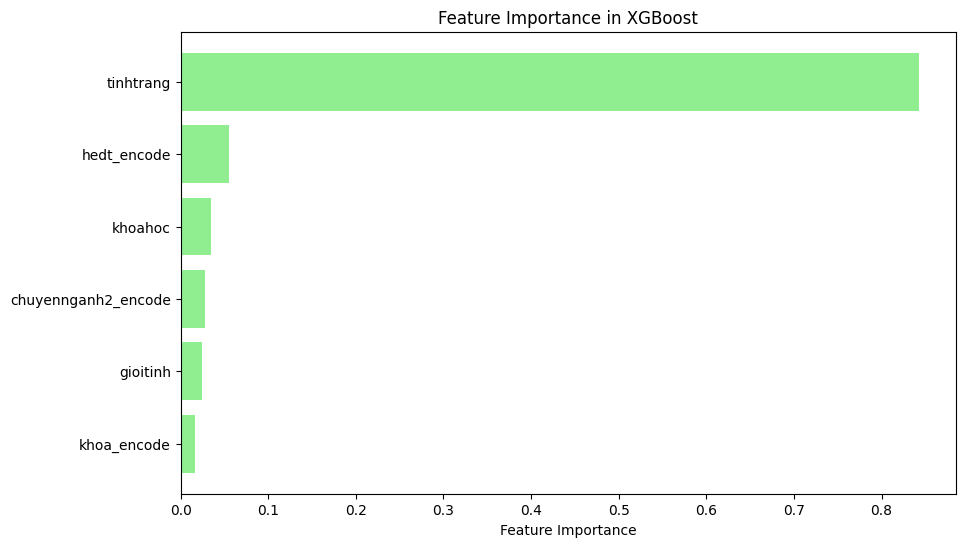

In [23]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

xgb_importances = xgb_model.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances from XGBoost:")
print(xgb_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_df["Feature"], xgb_feature_importance_df["Importance"], color="lightgreen")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost")
plt.gca().invert_yaxis()
plt.show()

Feature Importances from Lasso Regression:
               Feature  Importance
5            tinhtrang    0.582382
0             gioitinh    0.345647
4              khoahoc    0.175711
1          khoa_encode    0.000000
2          hedt_encode    0.000000
3  chuyennganh2_encode    0.000000


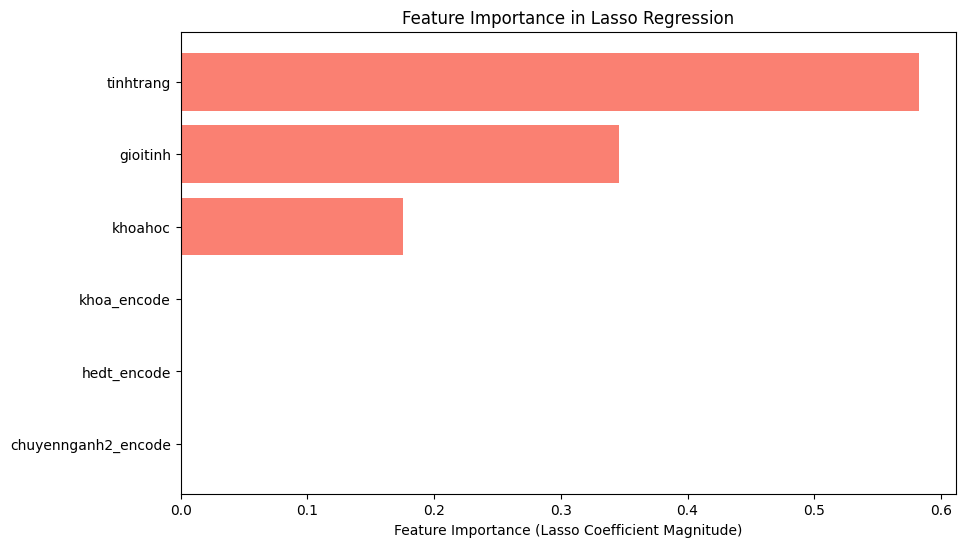

In [24]:
lasso_model = Lasso(alpha=0.01, random_state=42)

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_imputed, y)

lasso_importances = np.abs(lasso_model.coef_)

lasso_feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lasso_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances from Lasso Regression:")
print(lasso_feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(lasso_feature_importance_df["Feature"], lasso_feature_importance_df["Importance"], color="salmon")
plt.xlabel("Feature Importance (Lasso Coefficient Magnitude)")
plt.title("Feature Importance in Lasso Regression")
plt.gca().invert_yaxis()
plt.show()